<a href="https://colab.research.google.com/github/HernandezM22/SafeRoads2022/blob/Freddy-approach/Codigo_Freddy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

# Carga de datos

In [3]:
df = pd.read_csv('/content/drive/Shareddrives/SAS Safe Roads 2022 Hackathon/Datos/Canada/geotab_canada_on.csv')

In [4]:
df2 = pd.read_csv('/content/drive/Shareddrives/SAS Safe Roads 2022 Hackathon/Datos/Canada/ksi.csv')

In [5]:
df3 = pd.read_csv('/content/drive/Shareddrives/SAS Safe Roads 2022 Hackathon/Datos/Canada/traffic_collisions_asr_t_tbl_001.csv')

# Datos: KSI

In [6]:
frequency = []
for acc in df2.ACCLOC.unique():
  frequency.append(df2[df2.ACCLOC == acc].shape[0])

In [7]:
frequency.sort(reverse=True)

<BarContainer object of 10 artists>

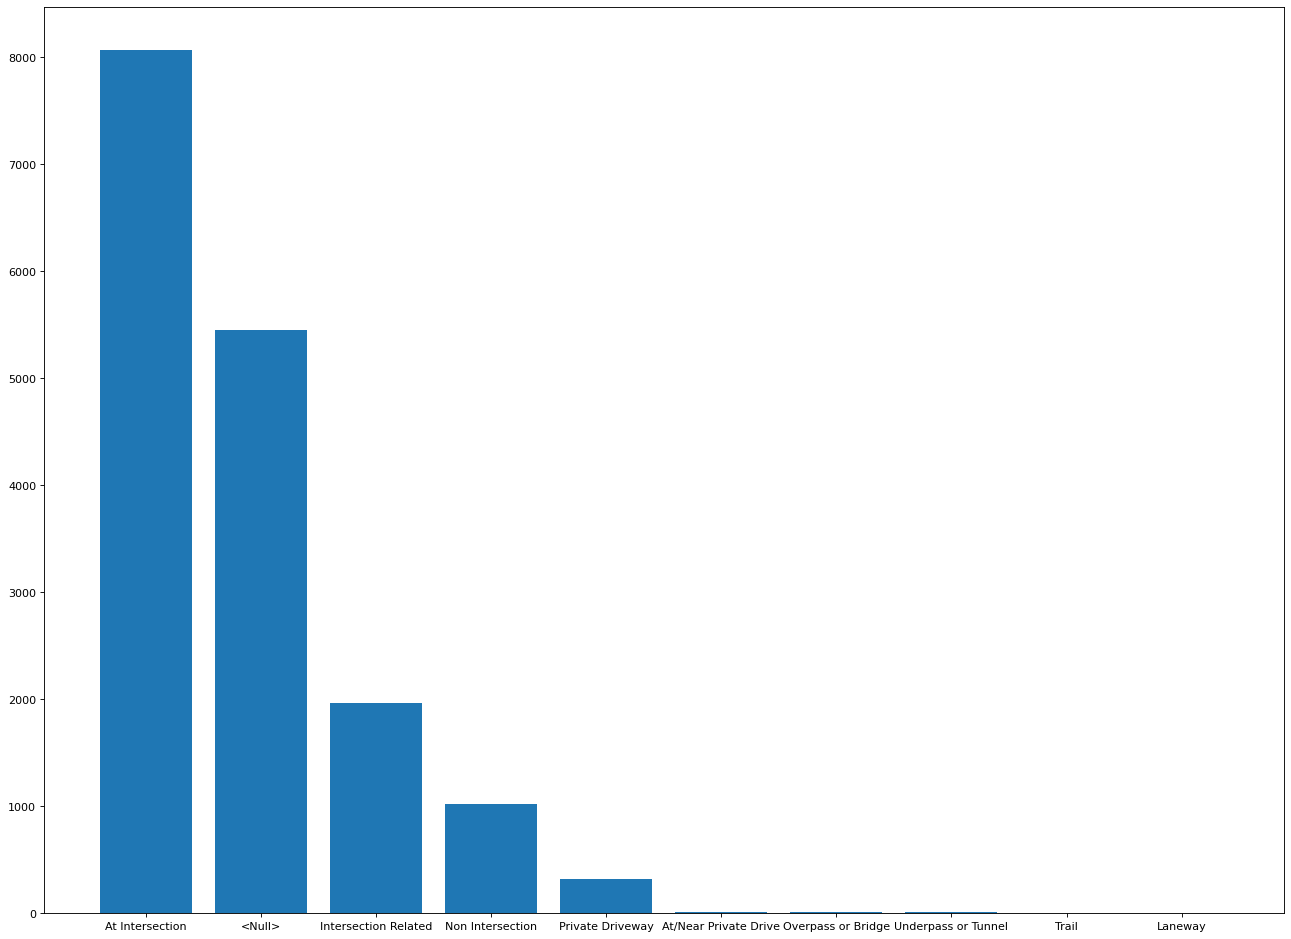

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(20, 15), dpi=80)

plt.bar(list(df2.ACCLOC.unique()), frequency)

Es importante notar que el problema de las colisiones se puede deber al diseño  de la calle. Sin embargo, queda por preguntar: ¿Qué tiene de específico la intersección que ocasiona la colisión? Esto lleva a pensar que el problema reside en la ingeniería de tráfico, pero debe explorarse.

## Serie de tiempo

In [9]:
nombre = lambda x: df2[df2.YEAR == x].shape[0] 

In [10]:
time_freq = []

for name in df2.YEAR.unique():
  time_freq.append(nombre(name))

Text(0, 0.5, 'Número de accidentes')

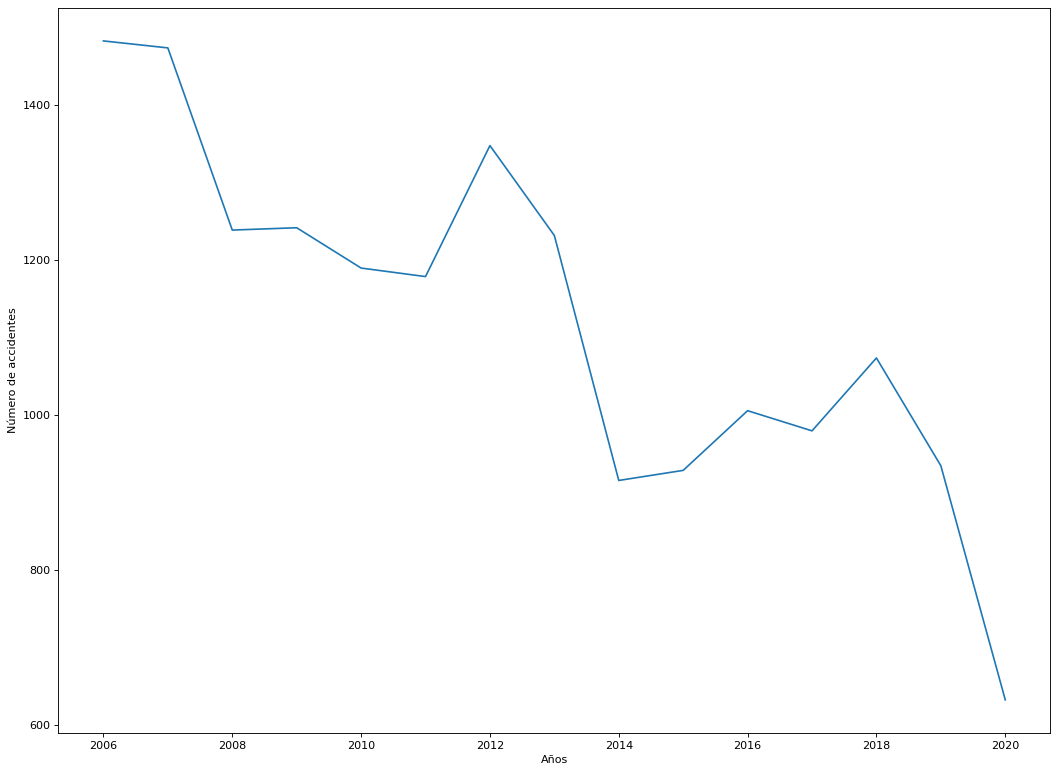

In [11]:
figure(figsize=(16, 12), dpi=80)
plt.plot(df2.YEAR.unique(), time_freq)
plt.xlabel('Años')
plt.ylabel('Número de accidentes')

Se evidencia una reducción del número de accidentes.

## Exploración: Null location

In [12]:
null_loc_df = df2[df2.ACCLOC == '<Null>']

In [55]:
from folium import Map
from folium import GeoJson
from folium.plugins import HeatMap
for_map = Map(location=[np.mean(null_loc_df.LATITUDE.values), np.mean(null_loc_df.LONGITUDE.values)], zoom_start=6, )
hm_wide = HeatMap(
    list(zip(null_loc_df.LATITUDE.values, null_loc_df.LONGITUDE.values)),
    min_opacity=0.2,
    radius=17, 
    blur=25, 
    max_zoom=1,
)
for_map.add_child(hm_wide)

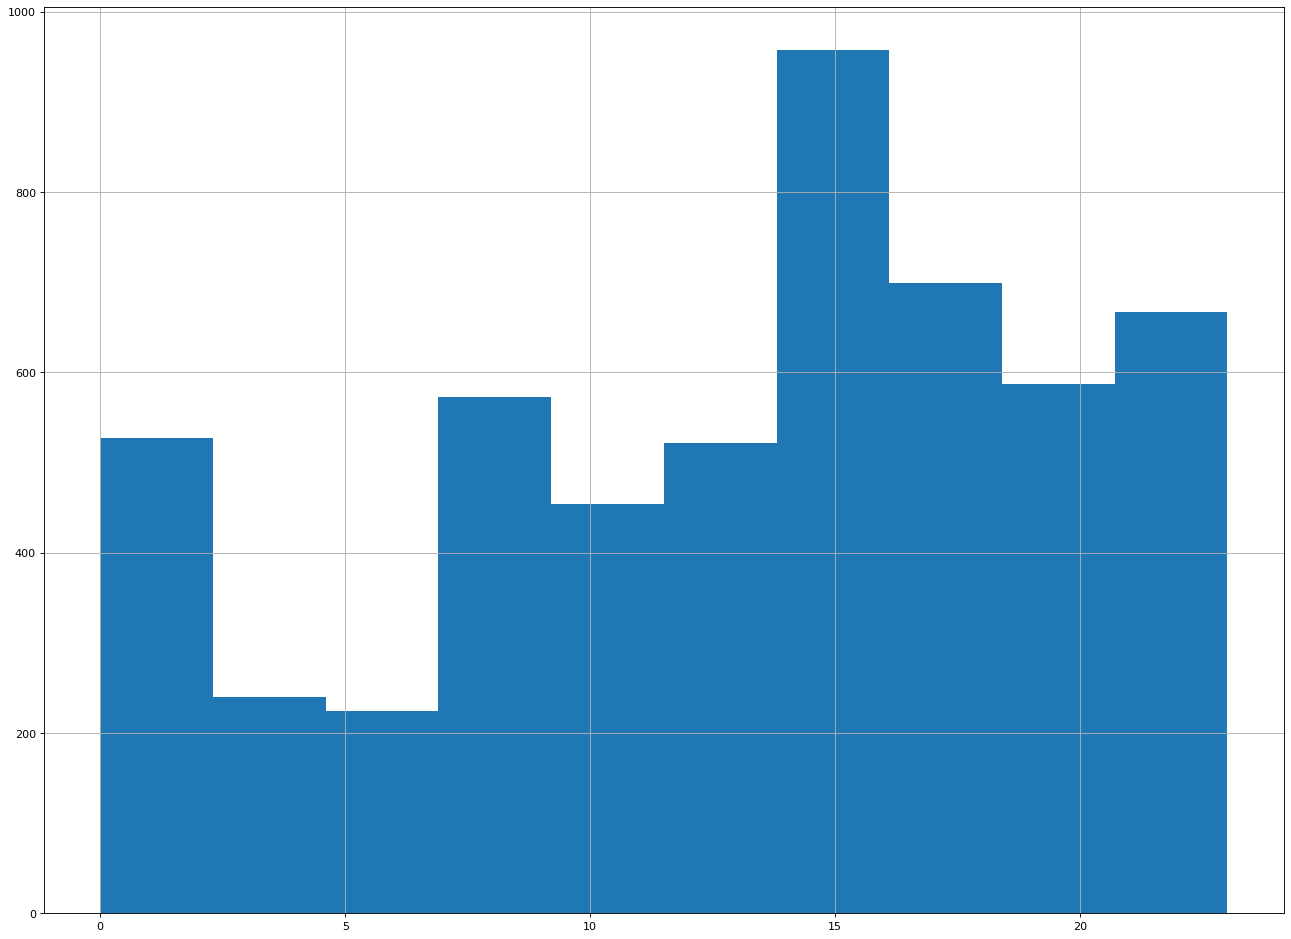

In [14]:
figure(figsize=(20, 15), dpi=80)
null_loc_df.HOUR.hist()


## Exploración: tipos de accidentes en el tiempo

In [15]:
acc_yearly_count = lambda x,y: df2[df2.YEAR == x][df2.IMPACTYPE == y].shape[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


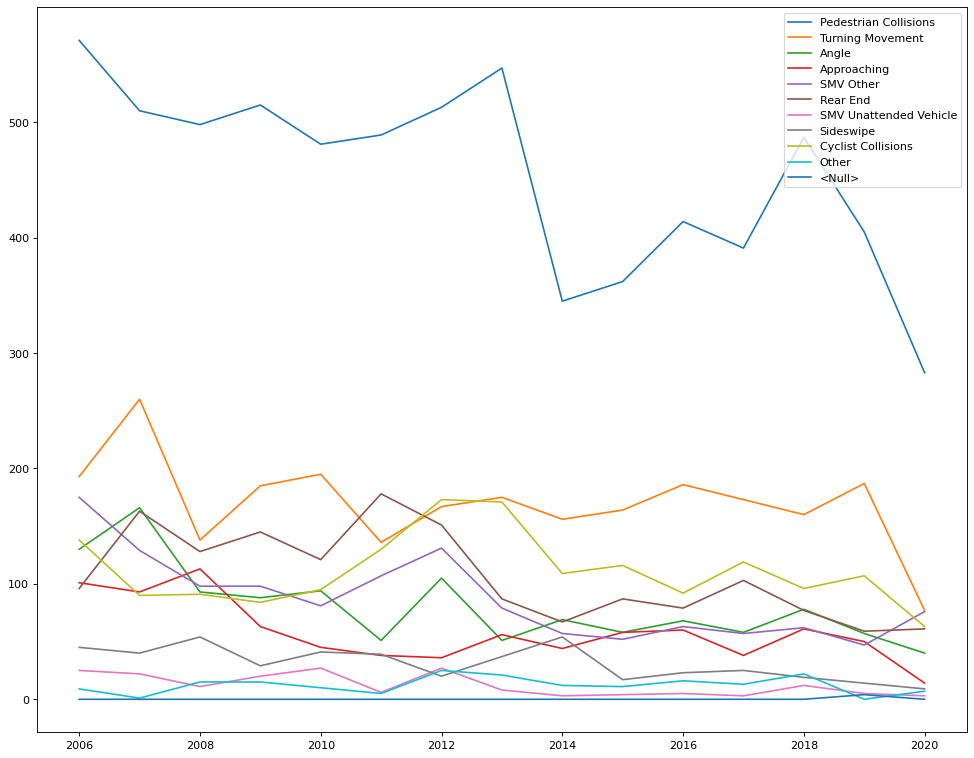

In [16]:
figure(figsize=(15, 12), dpi=80)

acc_types = list(df2.IMPACTYPE.unique())
acc_years = list(df2.YEAR.unique())


for imp in acc_types:
  frequence_acc = []
  for years in acc_years:
    frequence_acc.append(acc_yearly_count(years,imp))
  plt.plot(acc_years,frequence_acc, label = imp)

plt.legend()
plt.show()

Dentro del periodo que comprende 2018 a 2020, la mayoría de tendencias se muestran negativas. Esto puede deberse a que se creó una ley que regula el tránsito en la fecha. 

## Exploración: Clima

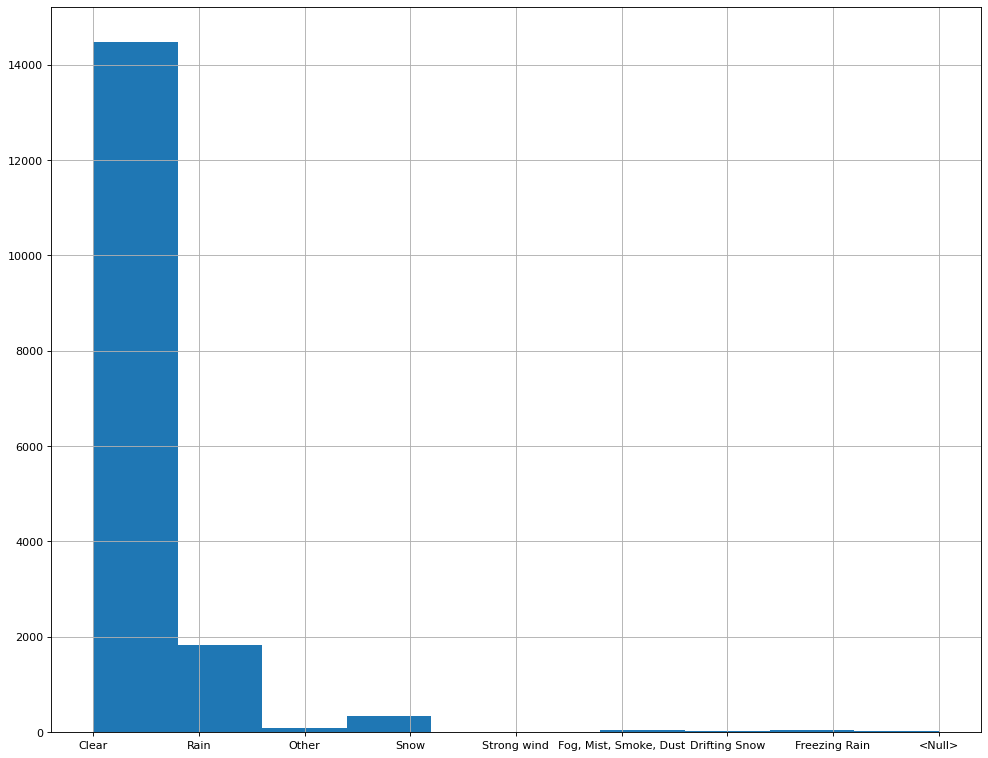

In [17]:
figure(figsize=(15, 12), dpi=80)
df2.VISIBILITY.hist()

Las condiciones climáticas no deberían ser sujeto a profundización, pues se evidencia que hay una gran diferencia entre un clima "Clear" al que le sigue "Rain". ¿Por qué influenciaría/ocasionaría una colisión tener un clima despejado?

## Exploración: Maniobras realizadas

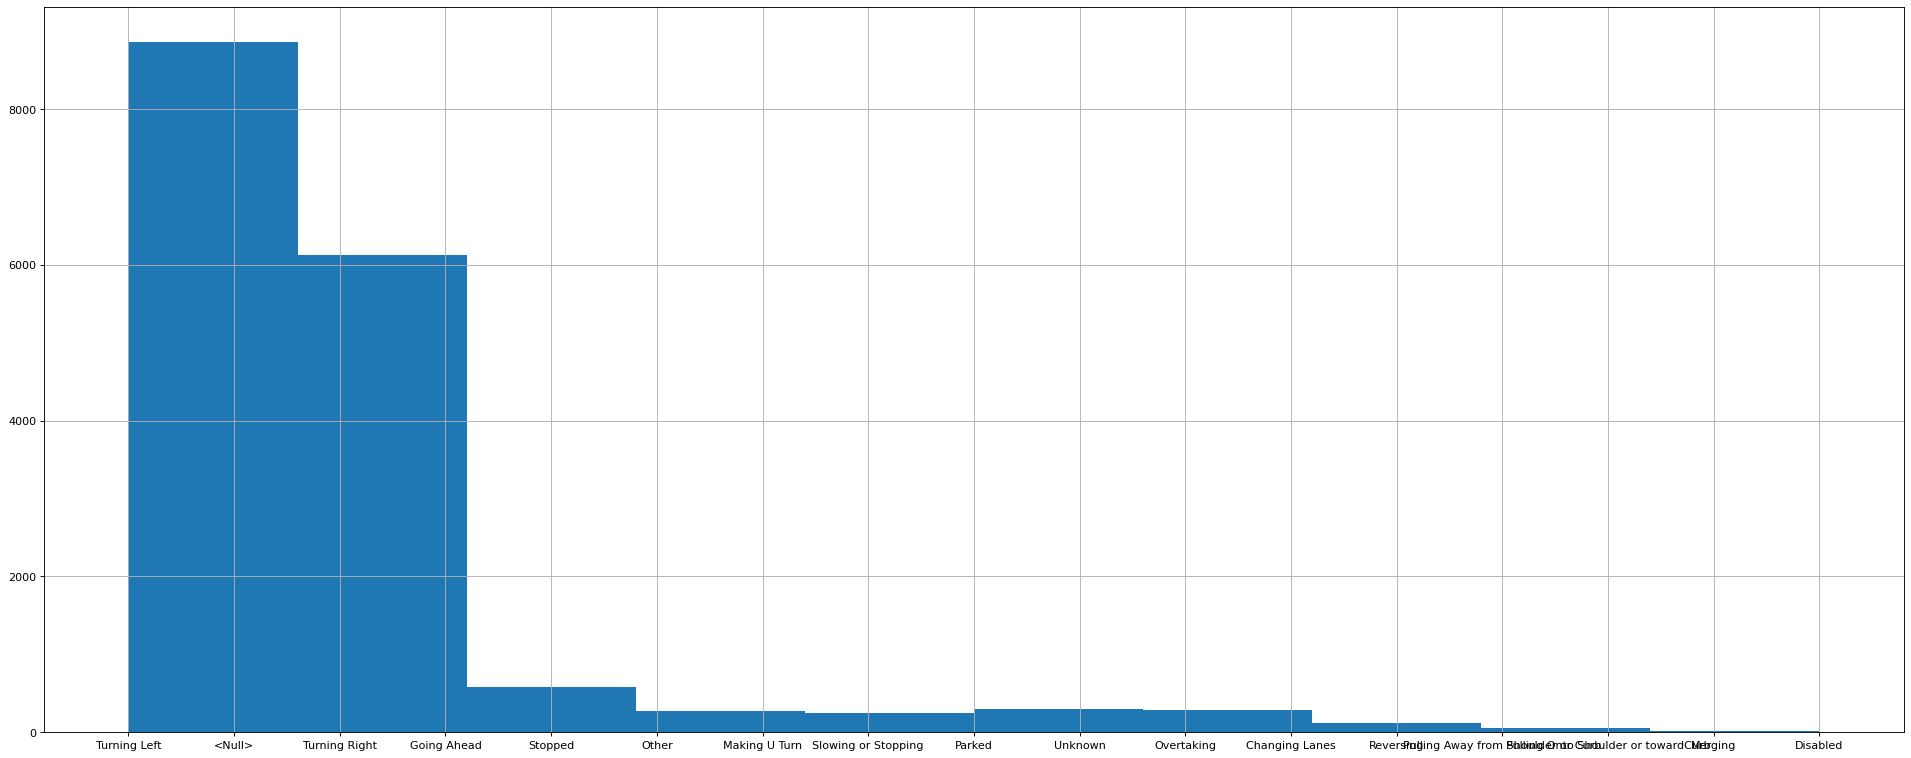

In [18]:
figure(figsize=(30, 12), dpi=80)
df2.MANOEUVER.hist()

Es interesante que la mayoría de accidentes ocurren cuando el automovil gira a la izquierda. Especificamente, girar a la izquierda tiene más peso. La primera duda que queda es que si esto es ocasionado por la visibilidad del conductor al no poder ver lo que tiene a su izquierda. 

### Sub-exploración: Colisiones cuando se gira a la izquierda

In [19]:
izq_df = df2[df2.MANOEUVER == 'Turning Left']

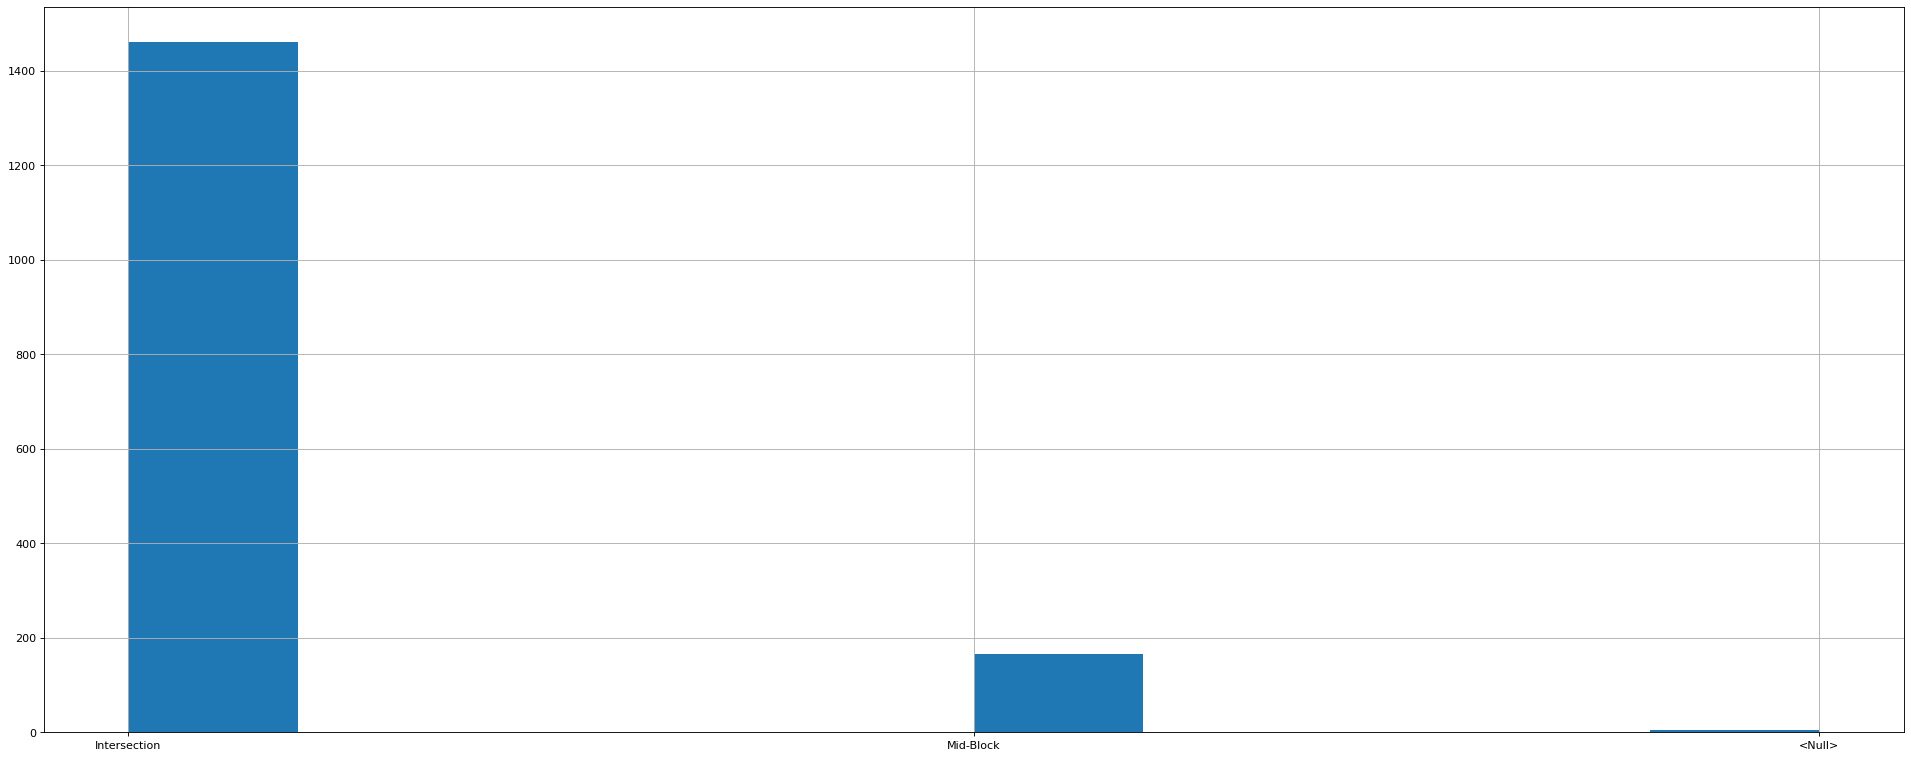

In [20]:
figure(figsize=(30, 12), dpi=80)
izq_df.LOCCOORD.hist()

El problema puede residir en la ingeniería de tráfico. Es decir, en el control de semáforos. 

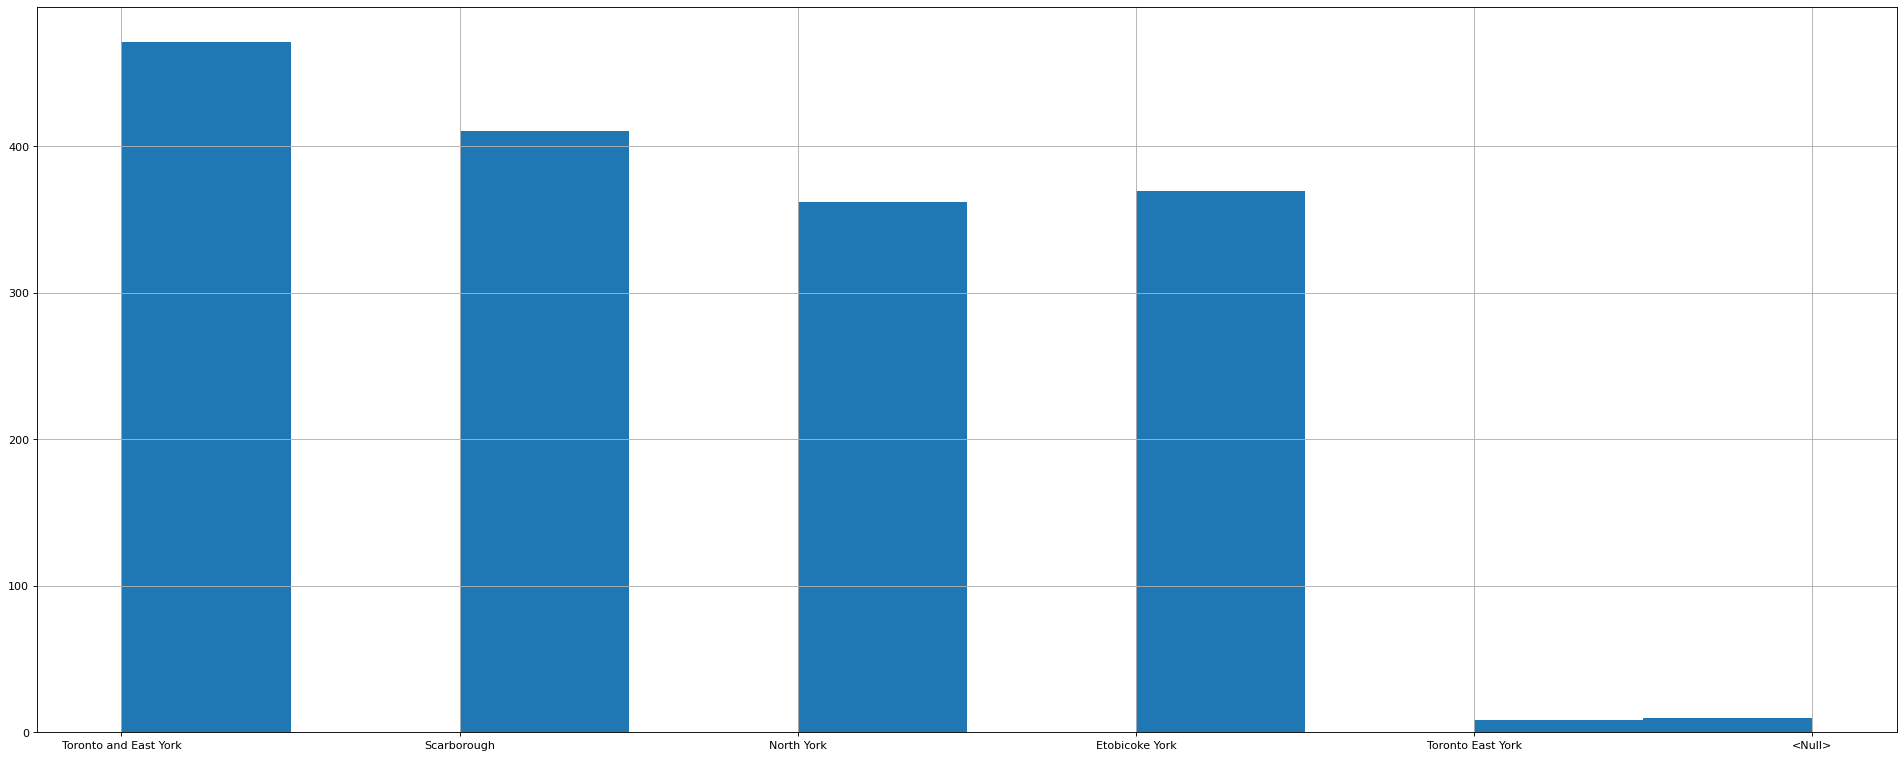

In [21]:
figure(figsize=(30, 12), dpi=80)
izq_df.DISTRICT.hist()

La mayoría de accidentes se ubican en 4 vecindarios. No es un factor que afecte a la colisión. 

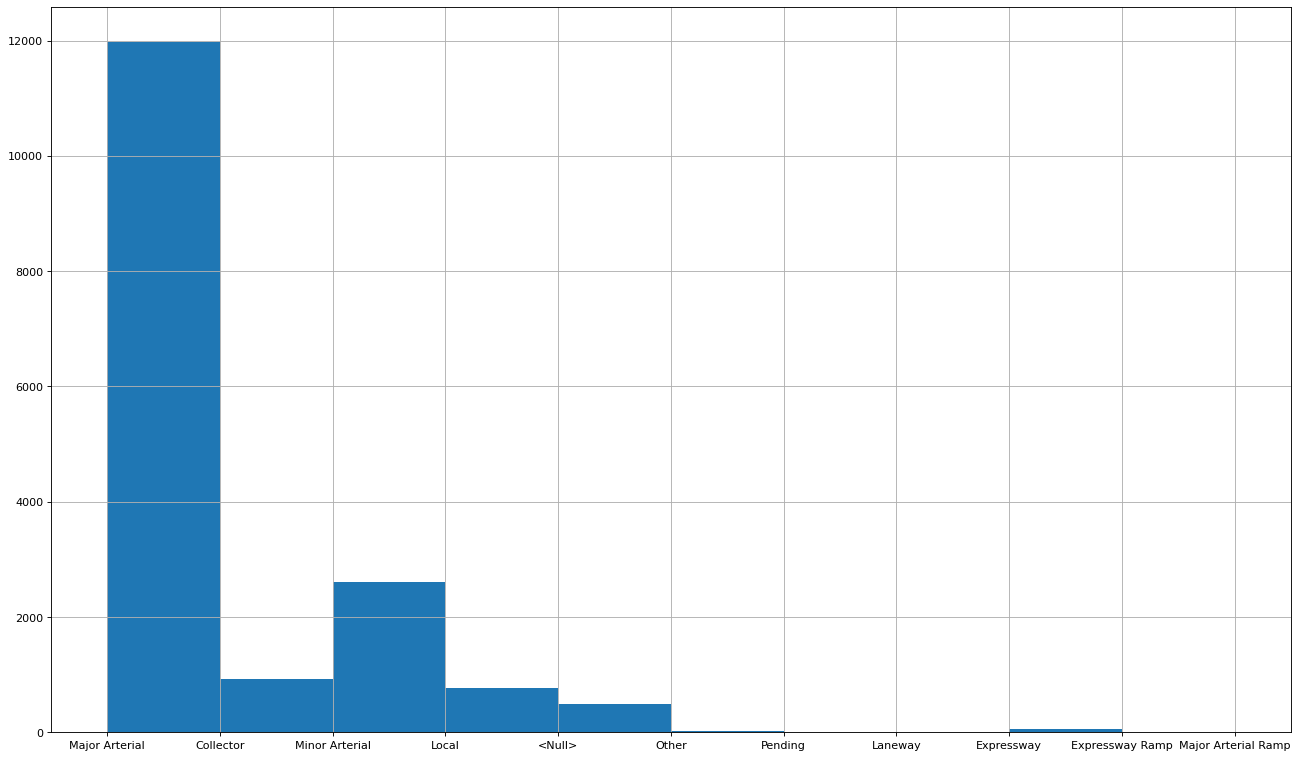

In [22]:
figure(figsize=(20, 12), dpi=80)
df2.ROAD_CLASS.hist()

Este gráfico demuestra la mayoría de colisiones ocurren en una Major Arterial. Un poco de **background:** The primary function of an arterial road is to deliver traffic from collector roads to freeways or expressways, and between urban centres at the highest level of service possible.

**Collector road:** A collector road or distributor road is a low-to-moderate-capacity road which serves to move traffic from local streets to arterial roads.

**Tip on intersections:** For new arterial roads, intersections are often reduced to increase traffic flow.

# Datos: Mapa de Toronto, Canada

In [23]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 9.1 MB/s 
     |████████████████████████████████| 6.3 MB 39.6 MB/s 
     |████████████████████████████████| 15.4 MB 46.4 MB/s 


In [24]:
import geopandas as gpd
from shapely import wkt

In [25]:
v_df = df[df.City == 'Toronto']

In [26]:
from folium import Map
from folium import GeoJson
from folium.plugins import HeatMap
for_map = Map(location=[np.mean(v_df.Latitude.values), np.mean(v_df.Longitude.values)], zoom_start=6, )
hm_wide = HeatMap(
    list(zip(v_df.Latitude.values, v_df.Longitude.values)),
    min_opacity=0.2,
    radius=17, 
    blur=25, 
    max_zoom=1,
)
for_map.add_child(hm_wide)

## Exploración: Severidad de incidentes

In [27]:
#Dataframe de tipo Geopandas
g_df = v_df.GeohashBounds.apply(wkt.loads)
g_df = gpd.GeoDataFrame(g_df, crs='epsg:4326')
g_df.columns = ['geometry']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


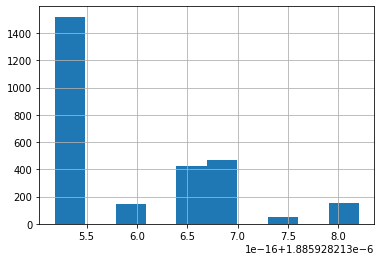

In [28]:
g_df.area.hist()

In [61]:
!pip install geoplot

     |████████████████████████████████| 10.8 MB 19.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 36.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 48.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 42.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 455 kB/s 
     |████████████████████████████████| 44 kB 2.4 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516303 sha256=1a91757c5b53dd888010a9a6bc96741f06028ab8b7ad36a72d7f9e8dd2205be7
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e1

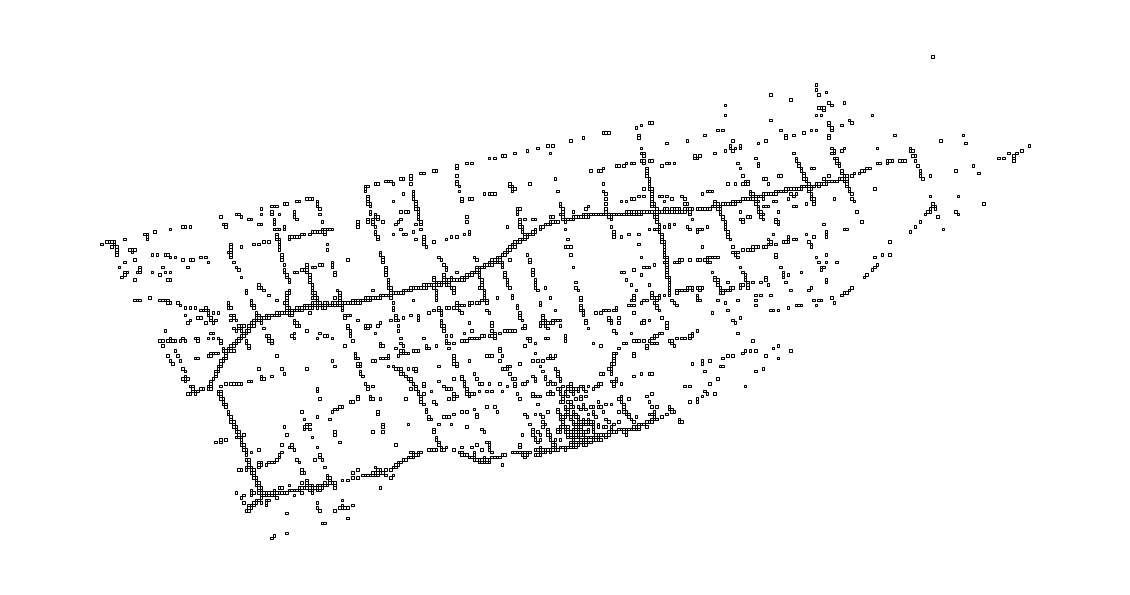

In [63]:
import geoplot
geoplot.polyplot(g_df, figsize=(20, 12))

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(np.array(v_df.SeverityScore).reshape(-1,1))

In [33]:
v_df['MaxMinSeverity'] = scaled_data.reshape(1,-1)[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
low_df = v_df[v_df.MaxMinSeverity <= 0.011409]

In [35]:
high_df = v_df[v_df.MaxMinSeverity > 0.011409]

Se hace una partición de datos con la finalidad de clasificar severidades altas y severidades bajas.

# DataFrame: Todos los puntos

In [102]:
coord_df = pd.DataFrame()

In [103]:
coord_df['Latitude'] = df[df.City == 'Toronto']['Latitude']
coord_df['Longitude'] = df[df.City == 'Toronto']['Longitude']

In [104]:
aux_df = pd.DataFrame()

In [105]:
aux_df['Latitude'] = df2.LATITUDE
aux_df['Longitude'] = df2.LONGITUDE

In [106]:
coord_df = coord_df.append(aux_df[['Latitude','Longitude']])

In [107]:
coord_gdf = gpd.GeoDataFrame(coord_df, geometry=gpd.points_from_xy(coord_df.Longitude, coord_df.Latitude))